### 3. To-DO

### Problem 1: Perform a classification task with knn from scratch.**

#### In the diabetes dataset, certain columns may contain 0 where it is biologically invalid (e.g., BMI, Glucose, etc.).

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [18]:
diabetes_data = pd.read_csv('Diabetes.csv')

print(diabetes_data.head())

print(diabetes_data.info())
print(diabetes_data.isnull().sum())
print(diabetes_data.describe())


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count

In [30]:
import numpy as np

# Check for missing values and handle appropriately
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_to_impute:
    diabetes_data[col] = diabetes_data[col].replace(0, np.nan)
    diabetes_data[col] = diabetes_data[col].fillna(diabetes_data[col].median())

# Verify no missing values
print(diabetes_data.isnull().sum())



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [32]:
features = diabetes_data.drop(columns=['Outcome'])
target = diabetes_data['Outcome']

train_size = int(0.7 * len(features))
X_train, X_test = features[:train_size], features[train_size:]
y_train, y_test = target[:train_size], target[train_size:]


#### Problem - 1: Perform a classification task with KNN from scratch.

#### 1. Load the Dataset:
 ###### - Read the dataset into a pandas DataFrame.
###### - Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset:
  ###### - Check data types
  ###### - Check for missing values
  ###### - Summary statistics

#### 2. Handle Missing Data:
###### - Handle any missing values appropriately, either by dropping or imputing them based on the data.

#### 3. Feature Engineering:
###### - Separate the feature matrix (X) and target variable (y).
###### - Perform a train-test split from scratch using a 70% − 30% ratio.

#### 4. Implement KNN:
######  - Build the KNN algorithm from scratch (no libraries like scikit-learn for KNN).
######  - Compute distances using Euclidean distance.
######  - Write functions for:
  ######  - Predicting the class for a single query.
  ######  - Predicting classes for all test samples.
######  - Evaluate the performance using accuracy.

In [34]:
import numpy as np

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train.values]
    sorted_indices = np.argsort(distances)[:k]
    nearest_labels = y_train.iloc[sorted_indices]
    prediction = np.bincount(nearest_labels).argmax()
    return prediction

def knn_predict(X_test, X_train, y_train, k=3):
    return np.array([knn_predict_single(query, X_train, y_train, k) for query in X_test.values])

try:
    predictions = knn_predict(X_test, X_train, y_train, k=3)
    accuracy = (predictions == y_test.values).mean() * 100
    print(f"Accuracy: {accuracy:.2f}%")
except Exception as e:
    print(f"An error occurred during the prediction or accuracy calculation: {e}")



Accuracy: 74.03%


## Problem - 2: Experimentation

#### 1. Repeat the Classification Task:
###### - Scale the feature matrix **X**.
###### - Use the scaled data for training and testing the kNN classifier.
###### - Record the results.

#### 2. Comparative Analysis: Compare the Results:
###### - Compare the accuracy and performance of the kNN model on the **original dataset** from Problem 1 versus the **scaled dataset**.
###### - Discuss:
  ###### - How scaling impacted the KNN performance.
  ###### - The reason for any observed changes in accuracy.

In [39]:
features = diabetes_data.drop(columns=['Outcome'])
target = diabetes_data['Outcome']

X_scaled = scale_data(features)
if X_scaled is None:
    print("Data scaling failed.")
else:
    train_size = int(0.7 * len(features))
    try:
        X_train_scaled, X_test_scaled = X_scaled[:train_size], X_scaled[train_size:]
        y_train, y_test = target[:train_size], target[train_size:]
    except Exception as e:
        print(f"An error occurred during data splitting: {e}")
        X_train_scaled, X_test_scaled, y_train, y_test = None, None, None, None

    if X_train_scaled is None or X_test_scaled is None:
        print("Data splitting failed.")
    else:
        try:
            scaled_predictions = knn_predict(X_test_scaled, X_train_scaled, y_train, k=3)
        except Exception as e:
            print(f"An error occurred during KNN prediction: {e}")
            scaled_predictions = None

        if scaled_predictions is not None:
            try:
                scaled_accuracy = (scaled_predictions == y_test.values).mean() * 100
                print(f"Accuracy on scaled data: {scaled_accuracy:.2f}%")
            except Exception as e:
                print(f"An error occurred during accuracy calculation: {e}")


Accuracy on scaled data: 75.32%


## Problem - 3: Experimentation with k

### 1. Vary the number of neighbors - k:
- Run the KNN model on both the original and scaled datasets for a range of:
  - \( k = 1, 2, 3, \dots, 15 \)
- For each \( k \), record:
  - Accuracy.
  - Time taken to make predictions.

### 2. Visualize the Results:
- Plot the following graphs:
  - k vs. Accuracy for original and scaled datasets.
  - k vs. Time Taken for original and scaled datasets.

### 3. Analyze and Discuss:
- Discuss how the choice of \( k \) affects the accuracy and computational cost.
- Identify the optimal \( k \) based on your analysis.

Original Dataset - k = 1: Accuracy = 69.70%, Time Taken = 0.3449s
Scaled Dataset - k = 1: Accuracy = 71.00%, Time Taken = 0.3048s
Original Dataset - k = 2: Accuracy = 74.03%, Time Taken = 0.3049s
Scaled Dataset - k = 2: Accuracy = 74.46%, Time Taken = 0.3373s
Original Dataset - k = 3: Accuracy = 74.03%, Time Taken = 0.3032s
Scaled Dataset - k = 3: Accuracy = 75.32%, Time Taken = 0.3036s
Original Dataset - k = 4: Accuracy = 73.16%, Time Taken = 0.3047s
Scaled Dataset - k = 4: Accuracy = 73.59%, Time Taken = 0.3041s
Original Dataset - k = 5: Accuracy = 74.46%, Time Taken = 0.3046s
Scaled Dataset - k = 5: Accuracy = 74.03%, Time Taken = 0.3020s
Original Dataset - k = 6: Accuracy = 77.49%, Time Taken = 0.3038s
Scaled Dataset - k = 6: Accuracy = 74.03%, Time Taken = 0.3024s
Original Dataset - k = 7: Accuracy = 77.06%, Time Taken = 0.3051s
Scaled Dataset - k = 7: Accuracy = 77.06%, Time Taken = 0.3042s
Original Dataset - k = 8: Accuracy = 77.49%, Time Taken = 0.3042s
Scaled Dataset - k = 8: 

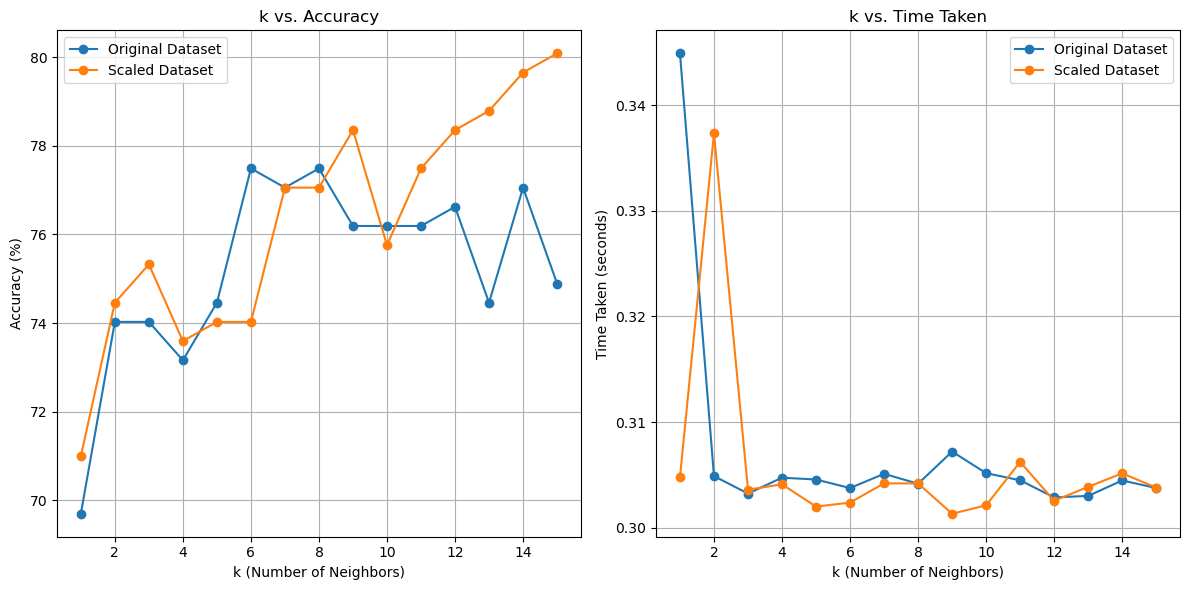

In [44]:
import time
import matplotlib.pyplot as plt

def evaluate_knn_k_values(X_train, y_train, X_test, y_test, X_train_scaled, X_test_scaled, y_train_scaled, k_values):
    original_accuracies = []
    scaled_accuracies = []
    original_times = []
    scaled_times = []

    for k in k_values:
        start_time = time.time()
        predictions = knn_predict(X_test, X_train, y_train, k=k)
        elapsed_time = time.time() - start_time
        accuracy = (predictions == y_test.values).mean() * 100
        original_accuracies.append(accuracy)
        original_times.append(elapsed_time)
        print(f"Original Dataset - k = {k}: Accuracy = {accuracy:.2f}%, Time Taken = {elapsed_time:.4f}s")

        start_time = time.time()
        scaled_predictions = knn_predict(X_test_scaled, X_train_scaled, y_train_scaled, k=k)
        elapsed_time = time.time() - start_time
        accuracy = (scaled_predictions == y_test.values).mean() * 100
        scaled_accuracies.append(accuracy)
        scaled_times.append(elapsed_time)
        print(f"Scaled Dataset - k = {k}: Accuracy = {accuracy:.2f}%, Time Taken = {elapsed_time:.4f}s")

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(k_values, original_accuracies, label='Original Dataset', marker='o')
    plt.plot(k_values, scaled_accuracies, label='Scaled Dataset', marker='o')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Accuracy (%)')
    plt.title('k vs. Accuracy')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(k_values, original_times, label='Original Dataset', marker='o')
    plt.plot(k_values, scaled_times, label='Scaled Dataset', marker='o')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Time Taken (seconds)')
    plt.title('k vs. Time Taken')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

k_values = range(1, 16)
evaluate_knn_k_values(X_train, y_train, X_test, y_test, X_train_scaled, X_test_scaled, y_train, k_values)
